In [37]:
import os,sys
cwd=os.getcwd()
sys.path.append(cwd)

In [38]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import run_test_packing
from run_test_packing import *
seed=0
xmax,xmin=1,0
ymax,ymin=1,0
zmax,zmin=1,0
ndimensions=3
radii_dist='lognormal'
radius_mu=1
radius_sig2=0.05
nsamples=1000
percentilemin,percentilemax=5,95

target_porosity=0.4

In [39]:
seed_increment=0
periodic_geometry=0
parameters, radii_scaled, registered, unregistered, pts, pvolumes, idx_points, boundary, boundary_indices, boundary_radii = Run_Correlated_Sphere_Packing('Parameters.in', seed_increment, seed,periodic_geometry,nsamples,target_porosity)


periodic_geometry,ndimensions,xmin,xmax,ymin,ymax,zmin,zmax,seed,radius_mu,radius_sig2,Cmu,Csig,filename,radii_dist,nsamples,target_porosity,nbins,num_neighbors,set_leafsize_factor,kdt_eps,pnorm,search_radius_factor_of_max_diameter,find_all_neighbors,percentilemin,percentilemax,show_hist,set_dt,blfac,damping,tstep,tprint,tstepmax,force_abstol,fmin,force_absmax_factor,force_reltol,max_overlap_factor,set_leafsize
 seed_increment  0  type  <class 'int'>
1,99 percentiles  (1.0000000000036453,) 1.4527869325588725e+53
max, min, mean 8.196456480371803e+48 1.0000000000036622 1.1141820609125237e+46
BOUINDARY LAYER [0.01, 0.99]
IBOUNDARY  [False False False False False  True  True False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
  True False False False False False False False False False False False
 False False False False False False False False False False False Fals

/home/chaztikov/Documents/gitcontrib/CorrelatedSpherePacking/python/run_test_packing.py:274: RuntimeWarning: overflow encountered in exp
  radii = np.exp(Z)



 No collisions found, continuing.. 

STORE BOUNDARY SPHERE DATA
STORE INTERIOR SPHERE DATA
SET POINT IDs (to keep track of boundary image spheres)

 domain size   [xmin,xmax]  0.0 1.0  [ymin,ymax]  0.0 1.0  [zmin,zmax]  0.0 1.0  volume  1.0
particle volumes: sum, mean, median, min, max 0.6000000000000115 0.0006666666666666794 1.0776331194717447e-147 1.0775996683039194e-147 0.5933840397918287

 
 
 porosity  0.6000000000000115

 number of spheres  (900,)

 number of registered spheres  (900,)

 number of unregistered spheres  (900,)

 sphere distribution parameters  0.002 0.05

 mean coordination number 

 
 
 


In [40]:
# radii_scaled[registered]
radii_scaled
# * 4 * np.pi / 3 

array([5.21293629e-01, 1.16457669e-01, 5.28676164e-06, 7.16366478e-24,
       4.70921187e-29, 3.78372105e-32, 1.24723139e-33, 1.27957182e-34,
       3.94792523e-35, 8.23562669e-37, 5.04651615e-37, 1.30750982e-37,
       1.29173874e-39, 1.17983850e-39, 4.21066172e-40, 3.33135677e-40,
       6.89411929e-41, 1.22451436e-41, 8.62875427e-42, 5.31421697e-42,
       7.19793016e-43, 4.86725995e-44, 1.13310746e-44, 3.56541572e-45,
       3.16681250e-45, 1.21546576e-45, 4.16222977e-46, 3.03424834e-46,
       1.38520258e-46, 1.04389646e-46, 8.26819709e-47, 6.73988290e-47,
       5.01925880e-47, 1.33757036e-47, 9.29741035e-48, 8.75739624e-48,
       8.23919311e-48, 8.21061677e-48, 7.71318212e-48, 5.95453129e-48,
       4.51530262e-48, 3.00707789e-48, 2.96177126e-48, 2.62303938e-48,
       2.60688755e-48, 2.60501421e-48, 1.75953072e-48, 1.30833976e-48,
       9.71190164e-49, 5.85631440e-49, 4.53016791e-49, 4.10783375e-49,
       3.93809413e-49, 3.27508318e-49, 2.87564001e-49, 2.37558329e-49,
      

In [16]:
RandomState = np.random.RandomState(seed)

# '''form uniform hexahedral mesh'''
# ncells = nsamples
# xx=np.linspace(xmin,xmax,ncells+1)
# dcell = np.diff(xx)[0]
domain_volume = (xmax-xmin) * (ymax-ymin) * (zmax-zmin)

periodic_bounds = np.array([xmax,ymax,zmax])[:ndimensions]



#lognormal
# probability distr. fcn.
# cumulative distr. fcn.
# inverse cdf 
# q05 = np.exp( )
#get rmin, rmin+rrange=:rmax given quantiles
#with quantiles, get truncated CDF
# given mean and variance, have median

#PART I
'''sample radii'''
# #sample radii 
# while target_porosity < v0:
# v0 = (radii**3 * 4*np.pi/(3 * (xmax-xmin)**3))
# v0 = v0/v0.sum()
if(radii_dist=='lognormal'):
    # V prior error, fix: mean of lognormal is mean of associated normal distribution

    #lognormal:
    # mean: exp(mu+sig2/2) 
    #median exp(mu) 
    #mode exp(mu - sig2) 
    #variance = mean^2 (-1+E^\[Sigma]^2)}
    #quantile q = E^(\[Mu] - Sqrt[2] \[Sigma]^2 InverseErfc[2 q])
    #Quantiles 
    # q05 = E^(\[Mu] - Sqrt[2]*E^(\[Mu] - Sqrt[2]*\[Sigma]^2*InverseErfc[1/10])*\[Sigma])
    # q95 = E^(\[Mu] - Sqrt[2]*E^(\[Mu] + Sqrt[2]*\[Sigma]^2*InverseErfc[1/10])*\[Sigma])} - -E^(\[Mu] - Sqrt[2]*E^(\[Mu] - Sqrt[2]*\[Sigma]^2*InverseErfc[1/10])*\[Sigma])

    lognormal_sig2 = np.log( radius_sig2 / radius_mu**2 + 1 )
    lognormal_mu = np.log( radius_mu ) - lognormal_sig2 / 2

    # Z = RandomState.lognormal( np.log(radius_mu) , radius_sig2 ,nsamples)
    Z = RandomState.lognormal( lognormal_mu , lognormal_sig2 ,nsamples)
    radii = np.exp(Z)

# if(show_hist==True):
#     plt.hist(radii,nbins)
#     plt.savefig('hist.png')

pmin = np.percentile(radii,percentilemin),
pmax = np.percentile(radii,percentilemax)
radii = radii[radii<pmax]
radii = radii[radii>pmin]
nsamplesclip = nsamples - radii.shape[0]
nsamples = radii.shape[0]# - nsamplesclip
radii = np.sort(radii)




print('1,99 percentiles ', pmin,pmax)
print('max, min, mean', radii.max(),radii.min(),radii.mean())


'''rescale radii to obtain desired porosity'''
rscale = ( (  np.sum(4*np.pi*(1/3.) * radii**3) ) / ( domain_volume * (1-target_porosity) ) )**(1/3)
radii_scaled = radii/rscale
radius_mu_scaled = radius_mu / rscale
radius_sig2_scaled = radius_sig2 / rscale**2
rmax = ( radii_scaled ).max()
dmax = 2*rmax
# delta = dcell - 2*rmax
search_radius = 2*dmax#+delta

print('max, min, mean', radii_scaled.max(),radii_scaled.min(),radii_scaled.mean())

1,99 percentiles  (2.462525941319799,) 2.876287831945722
max, min, mean 2.876286653026397 2.4625270848248704 2.654679888579408
max, min, mean 0.027216008303137855 0.023300931260372696 0.02511912010359949


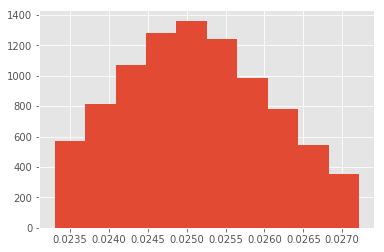

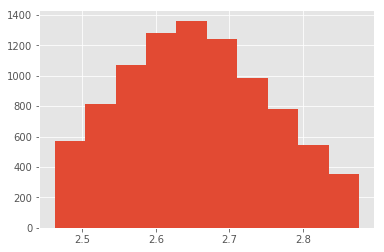

<module 'scipy' from '/home/chaztikov/.local/lib/python3.6/site-packages/scipy/__init__.py'>

In [19]:
plt.hist(radii_scaled,10)
plt.show()

plt.hist(radii,10)
plt.show()

import scipy
scipy.

In [42]:
sphere_volume = 4 * np.pi * radii**3 / 3 
solid_volume = sphere_volume.sum()
# solid_volume / domain_volume
solid_volume
sphere_volume

array([ 62.70373312,  63.35113662,  64.04370005,  64.33731221,
        65.79333763,  65.95246576,  66.43556145,  66.57445979,
        67.42994607,  67.63330288,  68.29187052,  68.94697014,
        69.05857333,  69.13115365,  69.29205645,  69.45073479,
        69.84188199,  70.526995  ,  71.08725054,  71.20867211,
        71.58542383,  72.13823805,  72.8242476 ,  72.8359472 ,
        73.56727847,  73.94188581,  74.09179235,  74.34771753,
        74.38099039,  74.50265694,  74.88440205,  74.98193713,
        75.93524131,  76.01669154,  76.21025269,  76.28861076,
        76.59804065,  77.12327789,  77.95169268,  78.77973247,
        78.84955129,  78.89722091,  79.01432221,  79.64221492,
        79.72590581,  79.89875421,  80.02420904,  80.04035369,
        80.28367255,  81.74777124,  81.87346792,  82.11866228,
        82.65137384,  82.7565703 ,  82.91644857,  82.94283675,
        83.04268187,  83.25766344,  83.44656061,  83.67743286,
        83.71265497,  86.05457284,  87.01949353,  87.43

In [53]:
np.loadtxt("test_packing.txt",delimiter=",",skiprows=1,unpack=True)[4]

array([5.212936e-01, 1.164577e-01, 5.286762e-06, 7.163665e-24,
       4.709212e-29, 3.783721e-32, 1.247231e-33, 1.279572e-34,
       3.947925e-35, 8.235627e-37, 5.046516e-37, 1.307510e-37,
       1.291739e-39, 1.179838e-39, 4.210662e-40, 3.331357e-40,
       6.894119e-41, 1.224514e-41, 8.628754e-42, 5.314217e-42,
       7.197930e-43, 4.867260e-44, 1.133107e-44, 3.565416e-45,
       3.166813e-45, 1.215466e-45, 4.162230e-46, 3.034248e-46,
       1.385203e-46, 1.043896e-46, 8.268197e-47, 6.739883e-47,
       5.019259e-47, 1.337570e-47, 9.297410e-48, 8.757396e-48,
       8.239193e-48, 8.210617e-48, 7.713182e-48, 5.954531e-48,
       4.515303e-48, 3.007078e-48, 2.961771e-48, 2.623039e-48,
       2.606888e-48, 2.605014e-48, 1.759531e-48, 1.308340e-48,
       9.711902e-49, 5.856314e-49, 4.530168e-49, 4.107834e-49,
       3.938094e-49, 3.275083e-49, 2.875640e-49, 2.375583e-49,
       2.192624e-49, 2.127873e-49, 1.657060e-49, 1.629798e-49,
       1.482704e-49, 1.462858e-49, 1.434629e-49, 1.3939

In [77]:
# Sphere Pack Analysis 

import numpy as np

idx,x,y,z,r = np.loadtxt("test_packing.txt",delimiter=",",skiprows=1,unpack=True)

# Check Porosity
volume = 0.
for i in range(0,len(idx)):
	volume = volume + 4./3.*np.pi*r[i]*r[i]*r[i]
print(1.-volume)


# Check Distribution Parameters
print(np.mean(r))
print(np.std(r))

#Check Overlap
count = 0 
for i in range(0,len(idx)):
    add_to_count=0;
    for j in range(i+1,len(idx)):
        distance = np.sqrt( (x[i]-x[j])*(x[i]-x[j]) + (y[i]-y[j])*(y[i]-y[j]) + (z[i]-z[j])*(z[i]-z[j]) )
        if (distance < (r[i]+r[j])):
            add_to_count=1
#         print(r[i],r[j])
#         distance = np.sqrt( (x[i]/r[i]-x[j]/r[j])**2 + (y[i]/r[i]-y[j]/r[j])**2 + (z[i]/r[i]-z[j]/r[j])**2 )
#         if (distance < 1):
#             print("OVERLAP!!!!"); 
#             print(i,j,x[i],y[i],z[i],x[j],y[j],z[j],distance,r[i]+r[j])
    count  = count + add_to_count; 
    
print(count)

0.4000000021365062
0.053588811611111106
0.005688263654886882
623


In [74]:
r

array([0.06772415, 0.06770995, 0.06761011, 0.06706067, 0.06682915,
       0.06666225, 0.06657197, 0.06650714, 0.06647203, 0.06634749,
       0.06633062, 0.06628267, 0.06609991, 0.06609598, 0.06605028,
       0.06603961, 0.06596485, 0.06587618, 0.06585726, 0.06583049,
       0.06571216, 0.06552786, 0.06541254, 0.06531093, 0.06529992,
       0.06520642, 0.06509059, 0.06505377, 0.06495629, 0.06491872,
       0.06488668, 0.06485774, 0.0648145 , 0.06459418, 0.06452416,
       0.06451216, 0.06449979, 0.06449908, 0.06448623, 0.06443122,
       0.0643689 , 0.06426975, 0.06426585, 0.06423411, 0.06423247,
       0.06423228, 0.0641221 , 0.0640301 , 0.0639282 , 0.06372723,
       0.06360729, 0.06355749, 0.06353522, 0.0634316 , 0.06335139,
       0.06322035, 0.06315975, 0.06313608, 0.06291275, 0.06289597,
       0.06279439, 0.06277902, 0.06275636, 0.06272196, 0.06268151,
       0.06266386, 0.06264389, 0.06257727, 0.06242703, 0.06242143,
       0.06239174, 0.06237644, 0.06234163, 0.06226283, 0.06225